In [1]:
# SET UP 
import pandas as pd 
import pyodbc
import sqlalchemy
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus
import seaborn as sns
import matplotlib.pyplot as plt


user = "SA"
password = quote_plus("Megalochan1@1@")
server = 'localhost,1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL Server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)

Anslutning till SQL Server lyckades


C:\Users\chn03\AppData\Local\Temp\ipykernel_27064\3841739435.py:27: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [2]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql_query(text(sql), conn)
    

#
    

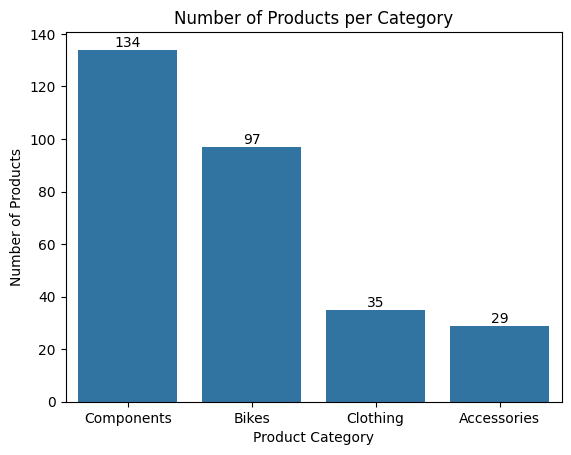

In [8]:
viz1= """
Select 
    PC.Name as CategoryName, 
    COUNT(DISTINCT P.ProductID) as ProductCount
From Production.ProductCategory as PC
Inner Join Production.ProductSubcategory as PS ON PC.ProductCategoryID = PS.ProductCategoryID  
Inner Join Production.Product as P ON PS.ProductSubcategoryID = P.ProductSubcategoryID
GROUP BY PC.Name
ORDER BY ProductCount DESC; 
"""


df_viz1 = query_df(viz1)
ax=sns.barplot(data=df_viz1, x='CategoryName', y='ProductCount')
ax.set_title('Number of Products per Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Products')
ax.bar_label(ax.containers[0])
plt.show()

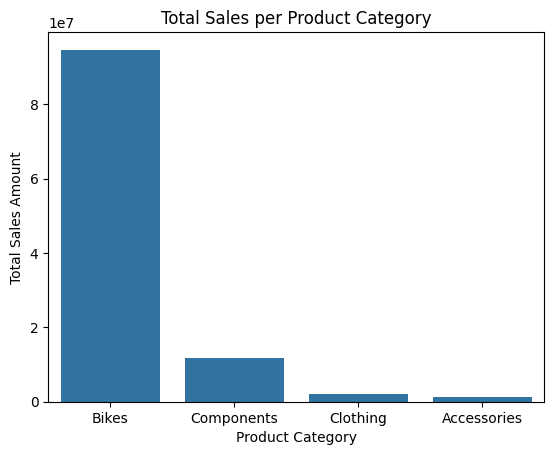

In [9]:
viz2= """
SELECT 
    PC.Name AS CategoryName, 
    SUM(SOD.LineTotal) AS LineTotal
FROM Production.ProductCategory AS PC 
INNER JOIN Production.ProductSubcategory AS PS ON PC.ProductCategoryID = PS.ProductCategoryID  
INNER JOIN Production.Product AS P ON PS.ProductSubcategoryID = P.ProductSubcategoryID
INNER JOIN sales.SalesOrderDetail AS SOD ON P.ProductID = SOD.ProductID
GROUP BY PC.Name     
ORDER BY SUM(SOD.LineTotal) DESC;
"""
df_viz2 = query_df(viz2)

ax=sns.barplot(data=df_viz2, x='CategoryName', y='LineTotal')
ax.set_title('Total Sales per Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Sales Amount')
plt.show()

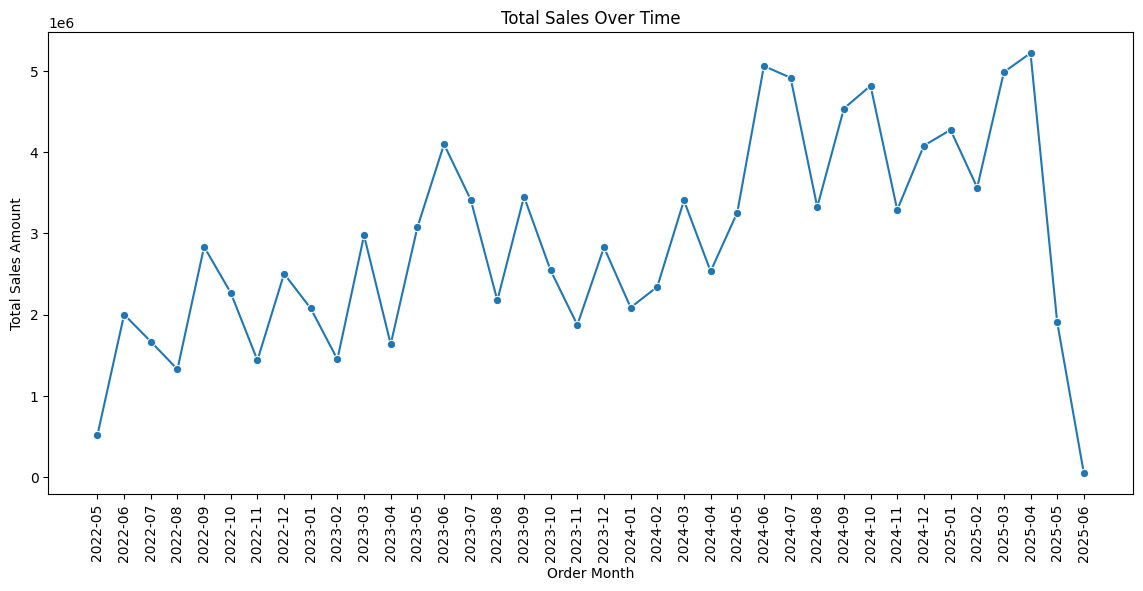

In [10]:
viz3= """
SELECT
FORMAT(SOD.OrderDate, 'yyyy-MM') AS OrderMonth,
    SUM(SOD.SubTotal) AS TotalSales
FROM Sales.SalesOrderHeader AS SOD
GROUP BY
    FORMAT(SOD.OrderDate, 'yyyy-MM')        
ORDER BY
    OrderMonth;
"""
df_viz3 = query_df(viz3)
plt.figure(figsize=(14, 6))
ax=sns.lineplot(data=df_viz3, x='OrderMonth', y='TotalSales', marker='o')
ax.set_title('Total Sales Over Time')   
ax.set_xlabel('Order Month')
ax.set_ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()



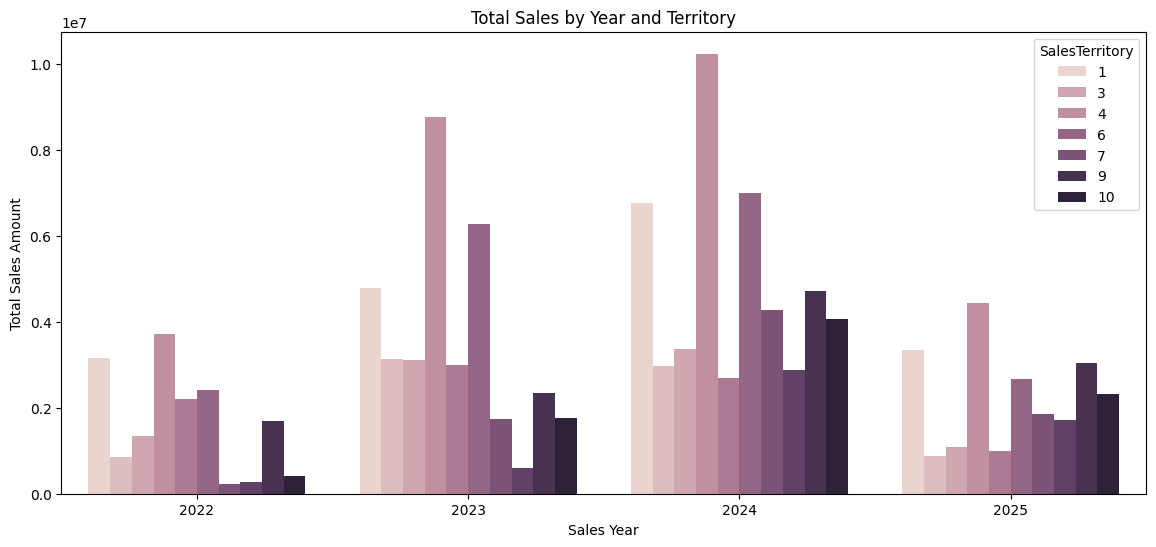

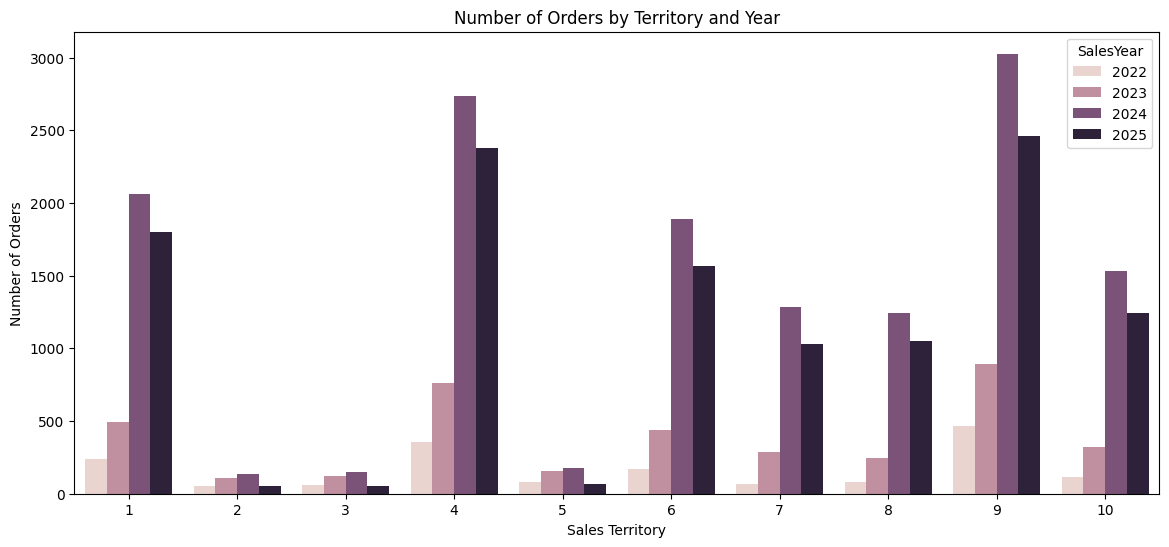

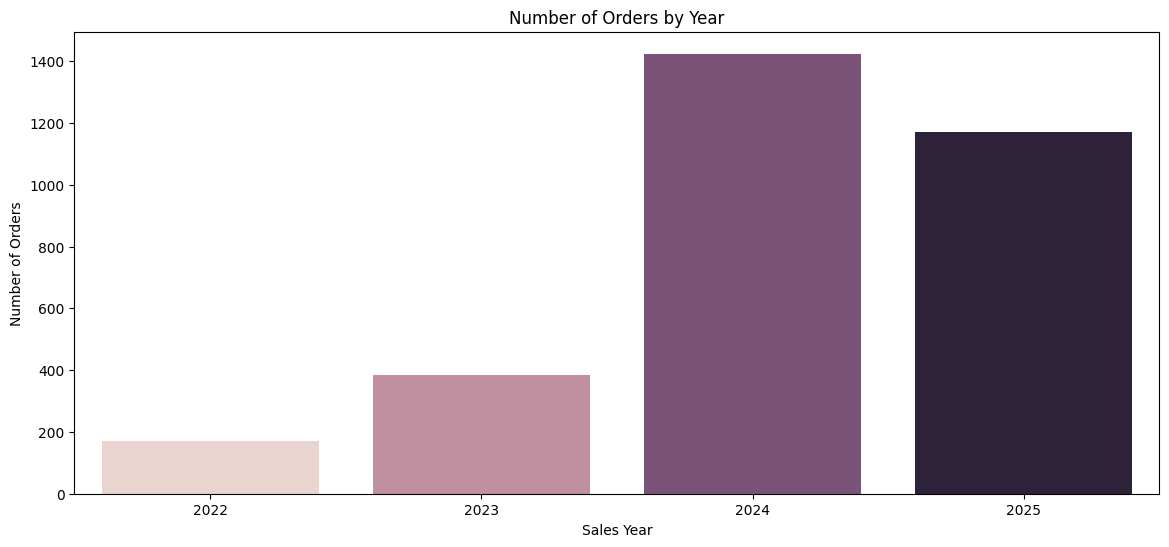

In [11]:
viz4= """
SELECT 
    
    COUNT(DISTINCT SalesOrderID) AS OrderCount,
    TerritoryID AS SalesTerritory,
    SUM(TotalDue) as TotalSales,
    YEAR(OrderDate) as SalesYear
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate), TerritoryID
ORDER BY SalesYear DESC, TotalSales DESC;
""" 
    
df_viz4 = query_df(viz4)
plt.figure(figsize=(14, 6))
ax=sns.barplot(data=df_viz4, x='SalesYear', y='TotalSales', hue='SalesTerritory')
ax.set_title('Total Sales by Year and Territory')
ax.set_xlabel('Sales Year')
ax.set_ylabel('Total Sales Amount')

plt.figure(figsize=(14, 6))
ax=sns.barplot(data=df_viz4, x='SalesTerritory', y='OrderCount', hue='SalesYear')
ax.set_title('Number of Orders by Territory and Year')
ax.set_xlabel('Sales Territory')
ax.set_ylabel('Number of Orders')


plt.figure(figsize=(14, 6))
ax= sns.barplot(data=df_viz4, x='SalesYear', y='OrderCount', errorbar=None, hue='SalesYear', legend=False)
ax.set_title('Number of Orders by Year')
ax.set_xlabel('Sales Year')
ax.set_ylabel('Number of Orders')



plt.show()

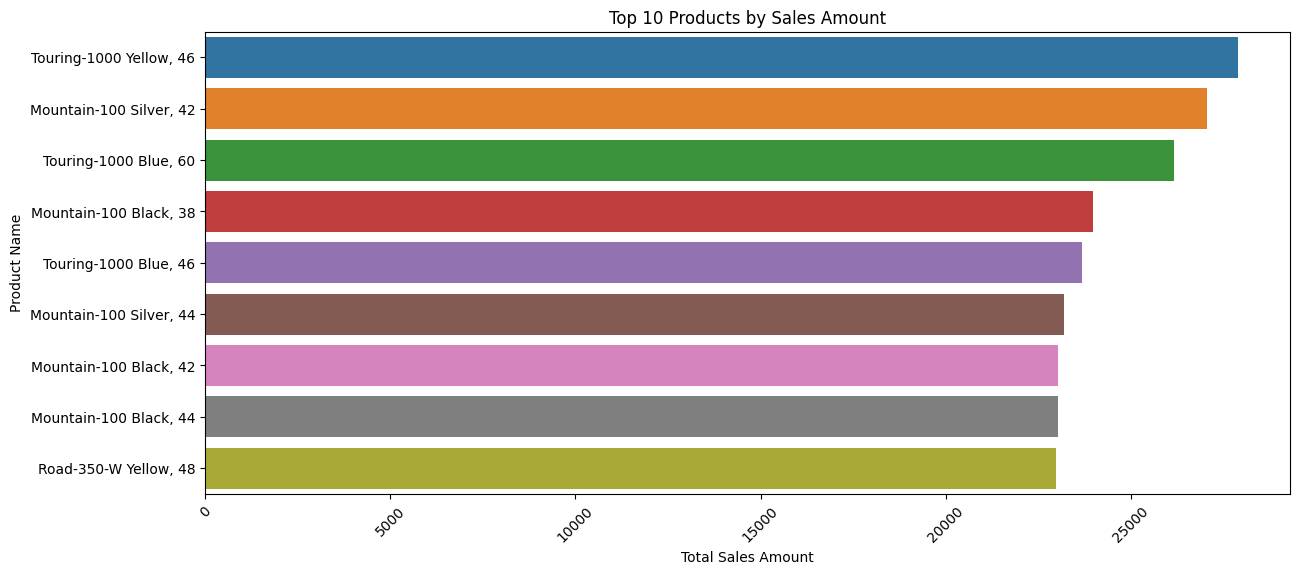

In [12]:
viz5= """
SELECT 
Distinct TOP 10 P.Name as ProductName,
SOD.LineTotal as TotalSales
FROM Sales.SalesOrderDetail SOD
JOIN Production.Product P
ON SOD.ProductID = P.ProductID
ORDER BY TotalSales DESC; 
""" 
df_viz5 = query_df(viz5)
plt.figure(figsize=(14, 6))
ax=sns.barplot(data=df_viz5, x='TotalSales', y='ProductName', errorbar=None, hue='ProductName', legend=False)
ax.set_title('Top 10 Products by Sales Amount') 
ax.set_xlabel('Total Sales Amount')
ax.set_ylabel('Product Name')
plt.xticks(rotation=45)
plt.show()

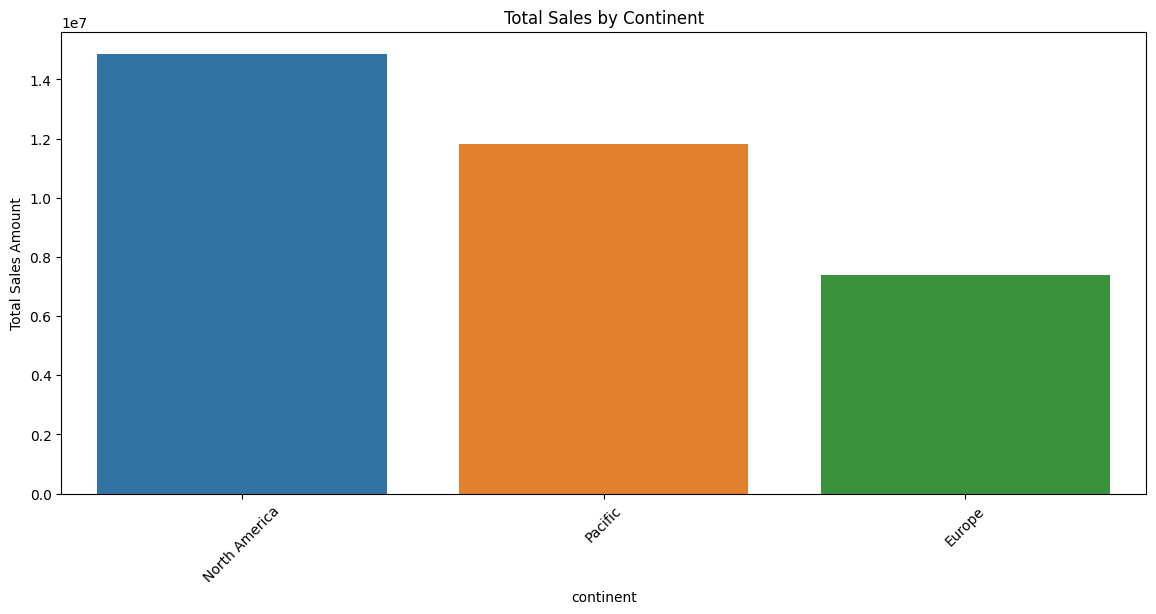

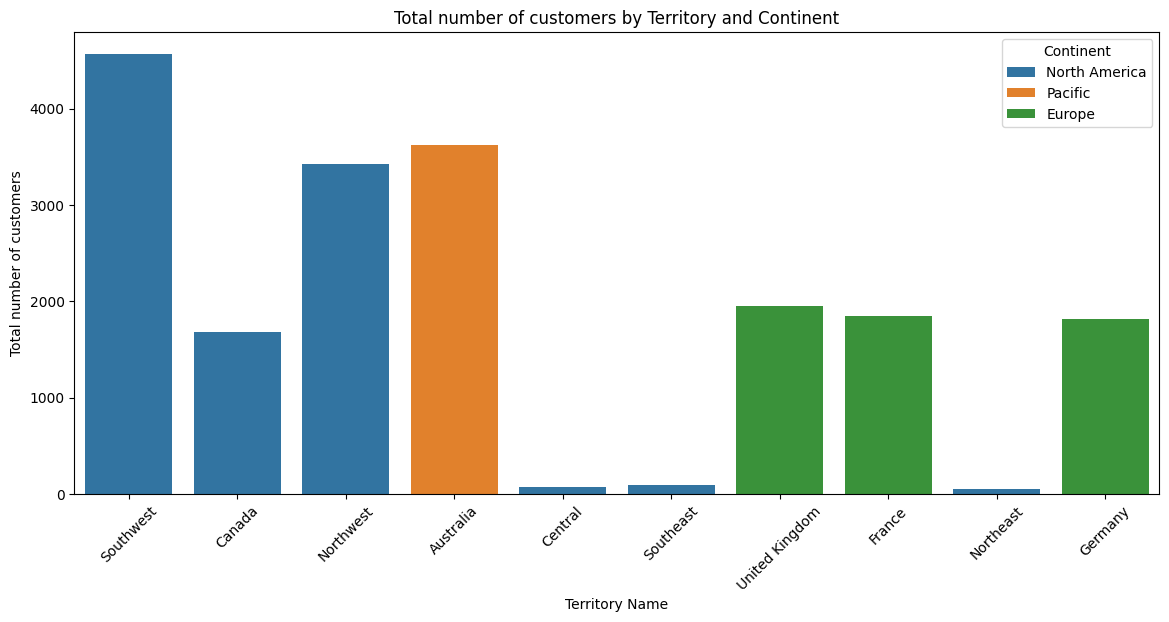

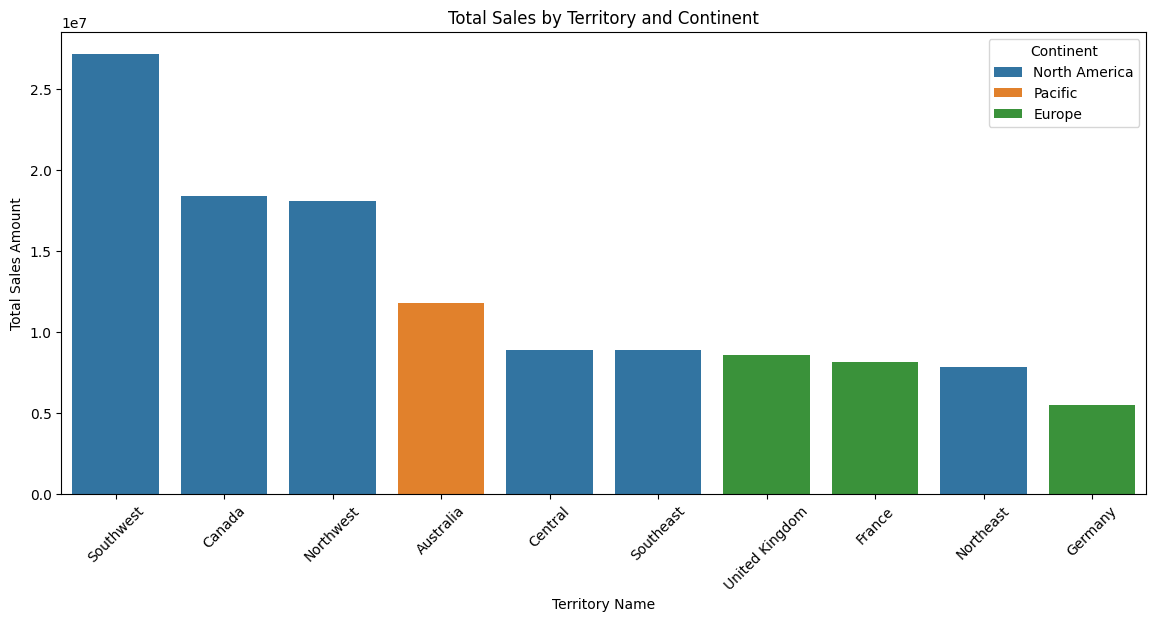

In [36]:
viz6= """
SELECT
    TERR.Name AS TerritoryName,   
    COUNT(DISTINCT CUST.CustomerID) AS CustomerCount,
    SUM(SOH.TotalDue) AS TotalSales,
    TERR.[Group] AS Continent
FROM Sales.SalesOrderHeader AS SOH
JOIN Sales.Customer AS CUST
ON SOH.CustomerID = CUST.CustomerID
JOIN Sales.SalesTerritory AS TERR
ON CUST.TerritoryID = TERR.TerritoryID
GROUP BY TERR.Name, TERR.[Group]
ORDER BY TotalSales DESC, CustomerCount DESC;
"""
df_viz6 = query_df(viz6)
plt.figure(figsize=(14, 6))
ax=sns.barplot(data=df_viz6, x='Continent', y='TotalSales', hue='Continent', legend=False, errorbar=None)
ax.set_title('Total Sales by Continent')  
ax.set_xlabel('continent')
ax.set_ylabel('Total Sales Amount')
plt.xticks(rotation=45)

plt.figure(figsize=(14, 6))
ax=sns.barplot(data=df_viz6, x='TerritoryName', y='CustomerCount', hue='Continent', errorbar=None)
ax.set_title('Total number of customers by Territory and Continent')  
ax.set_xlabel('Territory Name')
ax.set_ylabel('Total number of customers')
plt.xticks(rotation=45)


plt.figure(figsize=(14, 6))
ax=sns.barplot(data=df_viz6, x='TerritoryName', y='TotalSales', hue='Continent', errorbar=None)
ax.set_title('Total Sales by Territory and Continent')  
ax.set_xlabel('Territory Name')
ax.set_ylabel('Total Sales Amount')
plt.xticks(rotation=45)


plt.show()